<a href="https://colab.research.google.com/github/SrijaaimeenakshiM/ml-classification-hub/blob/main/Pizza_or_Steak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-01-26 04:01:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   146MB/s    in 0.7s    

2025-01-26 04:01:27 (146 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
#Extracting the zipfile
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Let us see the number of directories in each directory and number of files

import os

for dirpath,dirname,filename in os.walk("pizza_steak"):
  print(f"There are {len(dirname)} directories and {len(filename)} images in {dirpath}.")

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.


### So in the above output we can infer that there are 2 directories in pizza_steak------>test and train
test & train  contains 2 directories----->pizza & steak



pizza_train contains 750 images & pizza_test contains 250 images



steak_train contains 750 images & steak_test contains 250 images

#Now we can visually explore the images in random manner

In [ ]:
classes=os.listdir("pizza_steak/test/")
classes

['pizza', 'steak']

In [ ]:
#Creating a function to  visually explore
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def view_random_image(path,class_name):
   target_dir=path+"/"+class_name
   random_image= random.sample(os.listdir(target_dir),1)# this will return the filename of the image by choosing randomly, example [2548974.jpg]
   image=mpimg.imread(target_dir+"/"+random_image[0])# random_image[0] means it returns as a array taking the value alone ,example 2548974.jpg
   plt.imshow(image)
   plt.title(class_name)
   plt.axis(False)

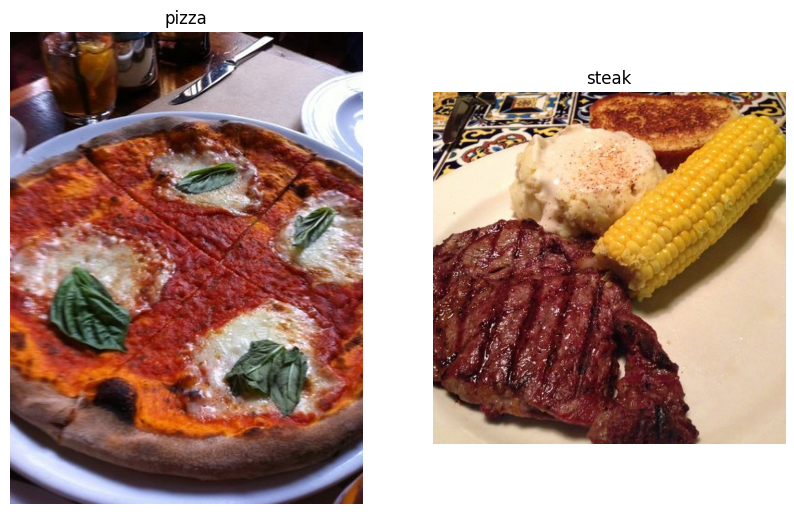

In [ ]:
#Let's test
#From training set
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
view_random_image("pizza_steak/train","pizza")

plt.subplot(1,2,2)
view_random_image("pizza_steak/train","steak")
plt.show()

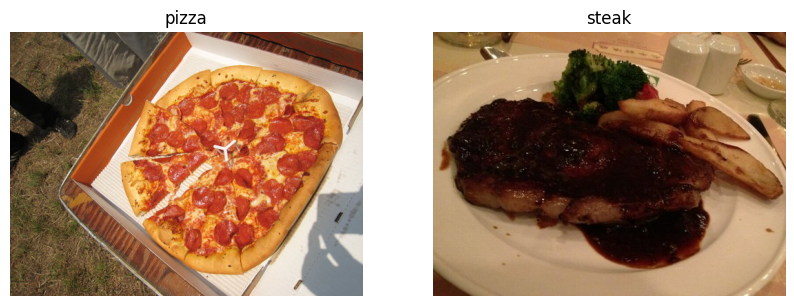

In [ ]:
#From testing set
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
view_random_image("pizza_steak/test","pizza")

plt.subplot(1,2,2)
view_random_image("pizza_steak/test","steak")
plt.show()

In [ ]:
# Now we are going to preprocess the image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen=ImageDataGenerator(rescale=1/255)

test_data_gen=ImageDataGenerator(rescale=1/255)


train_data=train_data_gen.flow_from_directory(directory="pizza_steak/train",
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)


test_data=test_data_gen.flow_from_directory(directory="pizza_steak/test",
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


#model_1

In [ ]:
import tensorflow as tf
input_layer=tf.keras.Input(shape=(224,224,3))

model_1=tf.keras.Sequential(
    [input_layer,
     tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",padding="valid",strides=1),
     tf.keras.layers.Conv2D(10,3,activation="relu"),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Conv2D(10,3,activation="relu"),
     tf.keras.layers.Conv2D(10,3,activation="relu"),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1,activation="sigmoid")
     ])


model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
#Now we can fit the model
history_1=model_1.fit(
    train_data,
    epochs=5,
    validation_data=test_data

)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.8628 - loss: 0.3074 - val_accuracy: 0.8380 - val_loss: 0.3572
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9151 - loss: 0.2407 - val_accuracy: 0.8260 - val_loss: 0.4164
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9155 - loss: 0.2028 - val_accuracy: 0.8240 - val_loss: 0.4616
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.9598 - loss: 0.1147 - val_accuracy: 0.8120 - val_loss: 0.5726
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9659 - loss: 0.0925 - val_accuracy: 0.6800 - val_loss: 1.1305


In [ ]:
#Evaluating
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 724ms/step - accuracy: 0.6867 - loss: 1.1426


[1.1305025815963745, 0.6800000071525574]

In [ ]:
#Let us create loss and accuracy curve function
import pandas as pd
def view_curve(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training acurracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("validation")
    plt.legend()

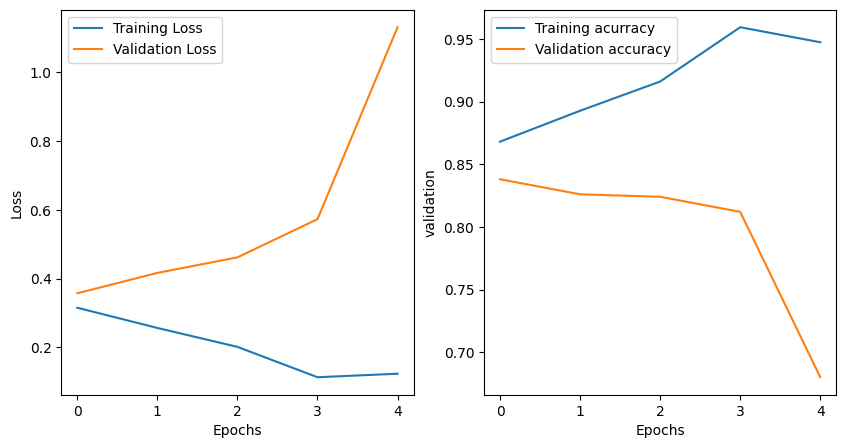

In [ ]:
view_curve(history_1)

#model_2

In [ ]:
#our model seems to be overfitting let us reduce the number of layers
input_layer=tf.keras.Input(shape=(224,224,3))

model_2=tf.keras.Sequential(
    [input_layer,
     tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",padding="valid",strides=1),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Conv2D(10,3,activation="relu"),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1,activation="sigmoid")
     ])


model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_2=model_2.fit(
    train_data,
    epochs=5,
    validation_data=test_data

)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5890 - loss: 0.7589 - val_accuracy: 0.7020 - val_loss: 0.5485
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7713 - loss: 0.4997 - val_accuracy: 0.8020 - val_loss: 0.4151
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8294 - loss: 0.4082 - val_accuracy: 0.8380 - val_loss: 0.3630
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8169 - loss: 0.3989 - val_accuracy: 0.8580 - val_loss: 0.3562
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8677 - loss: 0.3275 - val_accuracy: 0.8620 - val_loss: 0.3402


In [ ]:
model_2.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 388ms/step - accuracy: 0.8788 - loss: 0.3350


[0.34023740887641907, 0.8619999885559082]

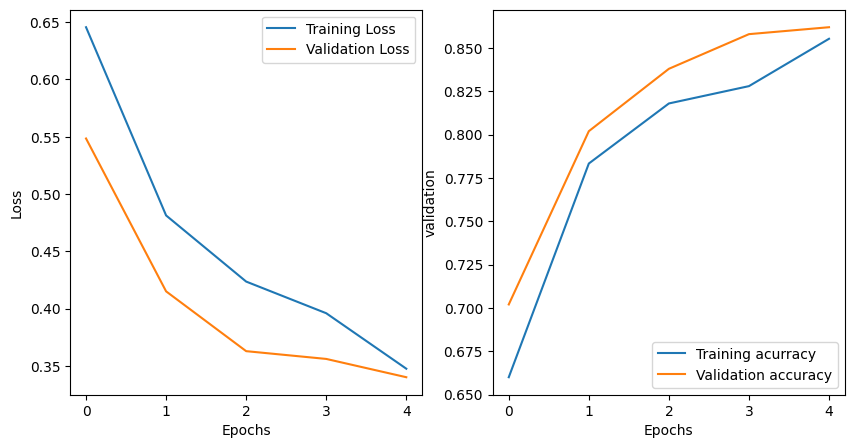

In [ ]:
view_curve(history_2)

In [ ]:
#Now our model is not overfitting let us try to increase our accuracy

#argumented data generator
train_data_gen_arg = ImageDataGenerator(
       rescale=1/255.,
       rotation_range=0.2,  # Rotate images by up to 20 degrees
       width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
       height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
       shear_range=0.2,  # Apply shear transformations
       zoom_range=0.2,  # Zoom in or out on images
       horizontal_flip=True,  # Flip images horizontally
       fill_mode='nearest',# Fill in missing pixels with the nearest value
   )

#train data generator without argumentation
train_data_gen = ImageDataGenerator(rescale=1/255.)

#test generator without argumentation
test_data_gen = ImageDataGenerator(rescale=1/255.)

#train_data with argumentation
train_data_arg=train_data_gen_arg.flow_from_directory(directory="pizza_steak/train",
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42,
                                              )

#train_data without argumentation
train_data=train_data_gen.flow_from_directory(directory="pizza_steak/train",
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42,
                                              )

#test_data without argumentation

test_data=test_data_gen.flow_from_directory(directory="pizza_steak/test",
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#let us see the difference between normat train_data and argumented train_data visually

images,labels=next(train_data_arg) ## it will give the first batch contains 32 images
images.shape


(32, 224, 224, 3)

In [ ]:
org_image,labels=next(train_data)
org_image.shape

(32, 224, 224, 3)

(-0.5, 223.5, 223.5, -0.5)

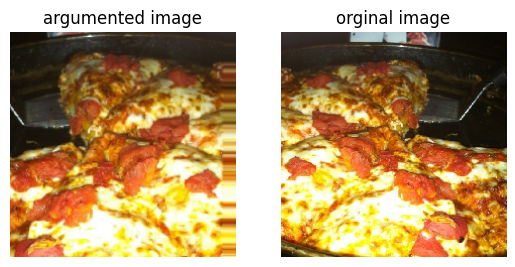

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

random_num=random.choice(range(len(images)))
plt.subplot(1,2,1)
plt.imshow(images[random_num])
plt.title("argumented image")
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(org_image[random_num])
plt.title("orginal image")
plt.axis(False)




In [ ]:
input_layer=tf.keras.Input(shape=(224,224,3))

model_3=tf.keras.Sequential(
    [input_layer,
     tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",padding="valid",strides=1),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Conv2D(10,3,activation="relu"),
     tf.keras.layers.MaxPooling2D(pool_size=2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1,activation="sigmoid")
     ])


model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_3=model_3.fit(
    train_data_arg,
    epochs=5,
    validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4673 - loss: 0.7955 - val_accuracy: 0.5080 - val_loss: 0.6818
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.6230 - loss: 0.6458 - val_accuracy: 0.7860 - val_loss: 0.5601
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.7069 - loss: 0.6018 - val_accuracy: 0.6080 - val_loss: 0.6053
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6221 - loss: 0.6499 - val_accuracy: 0.8200 - val_loss: 0.4430
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6949 - loss: 0.5931 - val_accuracy: 0.7580 - val_loss: 0.5135


In [ ]:
model_3.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 456ms/step - accuracy: 0.7343 - loss: 0.5309


[0.5135055780410767, 0.7580000162124634]

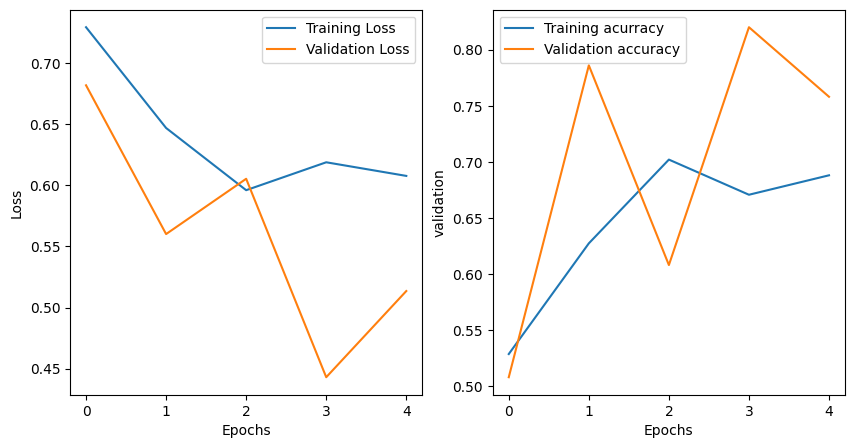

In [ ]:
view_curve(history_3)

# Yah among the 3 models we can tell model_2 is good of all
   

   so we can use model_2  for our prediction


In [ ]:
import numpy as np
def prediction(model,image,classes):

   img=tf.keras.preprocessing.image.load_img(image,target_size=(224,224))
   img_tensor=tf.keras.preprocessing.image.img_to_array(img)
   img_tensor=img_tensor/255
   img_tensor=np.expand_dims(img_tensor,axis=0)
   prediction=model.predict(img_tensor)

   image=mpimg.imread(image)
   plt.imshow(image)

   plt.title(classes[int(tf.round(prediction[0][0]).numpy())])
   plt.axis(False)
   #return prediction



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


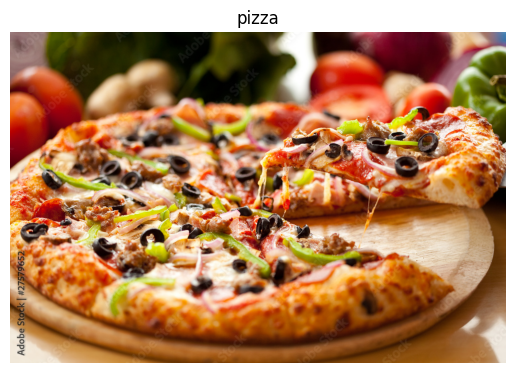

In [ ]:
prediction_result=prediction(model_2,"pizza.jpg",classes)
prediction_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


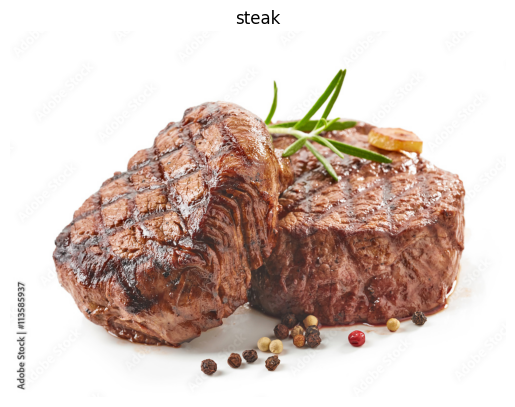

In [ ]:
result=prediction(model_2,"steak.jpg",classes)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


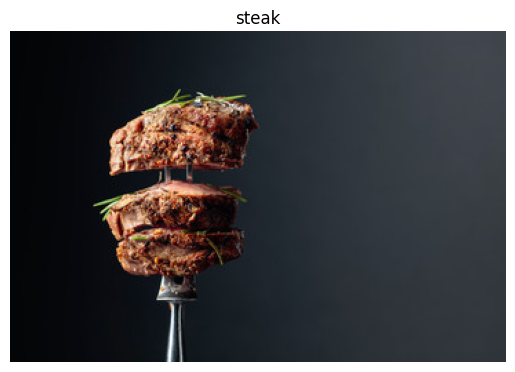

In [ ]:
prediction(model_2,"steak2.jpg",classes)
